In [80]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import files

uploaded = files.upload()

In [81]:
df = pd.read_csv('cell2celltrain.csv')

In [82]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [83]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


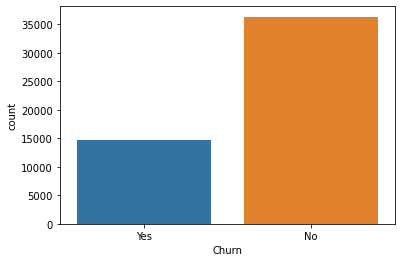

In [84]:
sns.countplot(df['Churn'])
plt.show()

**Checking for Null Values**


In [85]:
df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

## **Percentage Null**

In [86]:
round(df.isnull().sum() / len(df) * 100,2)

CustomerID                   0.00
Churn                        0.00
MonthlyRevenue               0.31
MonthlyMinutes               0.31
TotalRecurringCharge         0.31
DirectorAssistedCalls        0.31
OverageMinutes               0.31
RoamingCalls                 0.31
PercChangeMinutes            0.72
PercChangeRevenues           0.72
DroppedCalls                 0.00
BlockedCalls                 0.00
UnansweredCalls              0.00
CustomerCareCalls            0.00
ThreewayCalls                0.00
ReceivedCalls                0.00
OutboundCalls                0.00
InboundCalls                 0.00
PeakCallsInOut               0.00
OffPeakCallsInOut            0.00
DroppedBlockedCalls          0.00
CallForwardingCalls          0.00
CallWaitingCalls             0.00
MonthsInService              0.00
UniqueSubs                   0.00
ActiveSubs                   0.00
ServiceArea                  0.05
Handsets                     0.00
HandsetModels                0.00
CurrentEquipme

# Null Values are very less. So the records can be removed.

In [87]:
round((df[df['Churn'] == 'Yes'].isnull().sum() / len(df) * 100),2)

CustomerID                   0.00
Churn                        0.00
MonthlyRevenue               0.14
MonthlyMinutes               0.14
TotalRecurringCharge         0.14
DirectorAssistedCalls        0.14
OverageMinutes               0.14
RoamingCalls                 0.14
PercChangeMinutes            0.41
PercChangeRevenues           0.41
DroppedCalls                 0.00
BlockedCalls                 0.00
UnansweredCalls              0.00
CustomerCareCalls            0.00
ThreewayCalls                0.00
ReceivedCalls                0.00
OutboundCalls                0.00
InboundCalls                 0.00
PeakCallsInOut               0.00
OffPeakCallsInOut            0.00
DroppedBlockedCalls          0.00
CallForwardingCalls          0.00
CallWaitingCalls             0.00
MonthsInService              0.00
UniqueSubs                   0.00
ActiveSubs                   0.00
ServiceArea                  0.02
Handsets                     0.00
HandsetModels                0.00
CurrentEquipme

In [88]:
for i in df.columns:
    df.dropna(subset=[i],inplace=True)

In [89]:
df.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

## **Exploratory Data Analysis**

In [90]:
cat_df = df.select_dtypes(include=[np.object])
num_df = df.select_dtypes(include=[np.number])

In [91]:
corr_df = num_df.copy()
corr_df.corr()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
CustomerID,1.000000,-0.000594,0.083850,0.051110,-0.004802,0.004191,0.000562,-0.008727,0.004869,0.064191,0.037196,0.083486,0.119511,0.056031,0.039866,0.035098,0.025262,-0.011570,0.097891,0.065182,0.001986,0.022732,-0.766762,-0.022168,-0.039663,-0.285097,-0.294085,-0.409052,-0.116715,-0.087367,-0.061926,-0.046935,0.007145,-0.136868,-0.171203
MonthlyRevenue,-0.000594,1.000000,0.712734,0.629391,0.407523,0.787317,0.304086,-0.027052,-0.014223,0.429374,0.232651,0.450751,0.189579,0.200998,0.604762,0.495088,0.373419,0.642019,0.473354,0.417567,0.008935,0.469497,0.001205,-0.014949,-0.044068,0.243892,0.236179,-0.216644,-0.108608,-0.105829,0.012019,0.014795,0.017879,-0.079309,0.035417
MonthlyMinutes,0.083850,0.712734,1.000000,0.585375,0.392950,0.569083,0.112028,-0.044257,-0.038438,0.593149,0.318114,0.645650,0.375238,0.287670,0.828206,0.694517,0.558065,0.772486,0.765215,0.573916,0.018394,0.614970,-0.065558,-0.028869,-0.066116,0.303903,0.293145,-0.311033,-0.163928,-0.143321,0.011856,0.014966,0.064916,-0.145964,0.045723
TotalRecurringCharge,0.051110,0.629391,0.585375,1.000000,0.311440,0.201011,0.073855,-0.016284,-0.024126,0.354148,0.178584,0.359008,0.153056,0.148344,0.482062,0.410429,0.307202,0.552995,0.369690,0.335165,0.009562,0.355959,-0.045156,-0.020638,-0.058606,0.235735,0.226597,-0.247592,-0.106111,-0.101134,-0.017562,-0.002218,0.036912,-0.075415,0.044019
DirectorAssistedCalls,-0.004802,0.407523,0.392950,0.311440,1.000000,0.287109,0.070134,-0.025542,-0.014696,0.262960,0.140135,0.306220,0.094066,0.134143,0.282247,0.315242,0.186776,0.419658,0.274796,0.253054,0.002759,0.308005,0.017889,-0.001969,-0.014442,0.183002,0.170469,-0.120887,-0.058874,-0.057644,0.010556,0.013857,-0.005592,-0.014985,0.022616
OverageMinutes,0.004191,0.787317,0.569083,0.201011,0.287109,1.000000,0.062955,-0.026377,-0.014570,0.329464,0.190967,0.362627,0.137185,0.164275,0.513705,0.404062,0.317985,0.517419,0.390702,0.328767,0.004307,0.457071,0.003375,-0.003472,-0.014086,0.143777,0.143102,-0.124190,-0.065212,-0.062350,0.014741,0.008474,0.008452,-0.048051,0.021671
RoamingCalls,0.000562,0.304086,0.112028,0.073855,0.070134,0.062955,1.000000,-0.055106,-0.093108,0.066135,0.029070,0.038768,0.020528,0.024108,0.045131,0.045443,0.020652,0.062736,0.031287,0.059513,0.003524,0.036037,-0.009516,-0.002963,-0.002182,0.024344,0.022641,-0.027969,-0.010467,-0.012171,-0.002423,-0.000440,-0.007440,-0.014034,0.004952
PercChangeMinutes,-0.008727,-0.027052,-0.044257,-0.016284,-0.025542,-0.026377,-0.055106,1.000000,0.607504,-0.082284,-0.054548,-0.085781,-0.040239,-0.028807,-0.106360,-0.062718,-0.068281,-0.108065,-0.089657,-0.087335,-0.003306,-0.128228,0.005496,0.002349,0.009994,-0.011222,-0.010669,-0.005830,0.014243,0.003986,-0.021400,-0.008232,0.003520,0.012162,-0.004715
PercChangeRevenues,0.004869,-0.014223,-0.038438,-0.024126,-0.014696,-0.014570,-0.093108,0.607504,1.000000,-0.036180,-0.031916,-0.054309,-0.031468,0.014467,-0.078286,-0.038975,-0.044919,-0.078299,-0.051762,-0.044256,-0.002710,-0.092176,-0.005759,0.002367,0.005341,-0.016845,-0.015881,0.006046,0.006914,0.001920,-0.018961,-0.012295,0.001244,0.005066,-0.005234
DroppedCalls,0.064191,0.429374,0.593149,0.354148,0.262960,0.329464,0.066135,-0.082284,-0.036180,1.000000,0.184385,0.541497,0.293616,0.261190,0.517244,0.564891,0.395626,0.573118,0.600716,0.717652,0.004666,0.397990,-0.044335,-0.020567,-0.050117,0.225189,0.217574,-0.216252,-0.119905,-0.108245,0.020417,0.014650,0.024921,-0.097358,0.031109


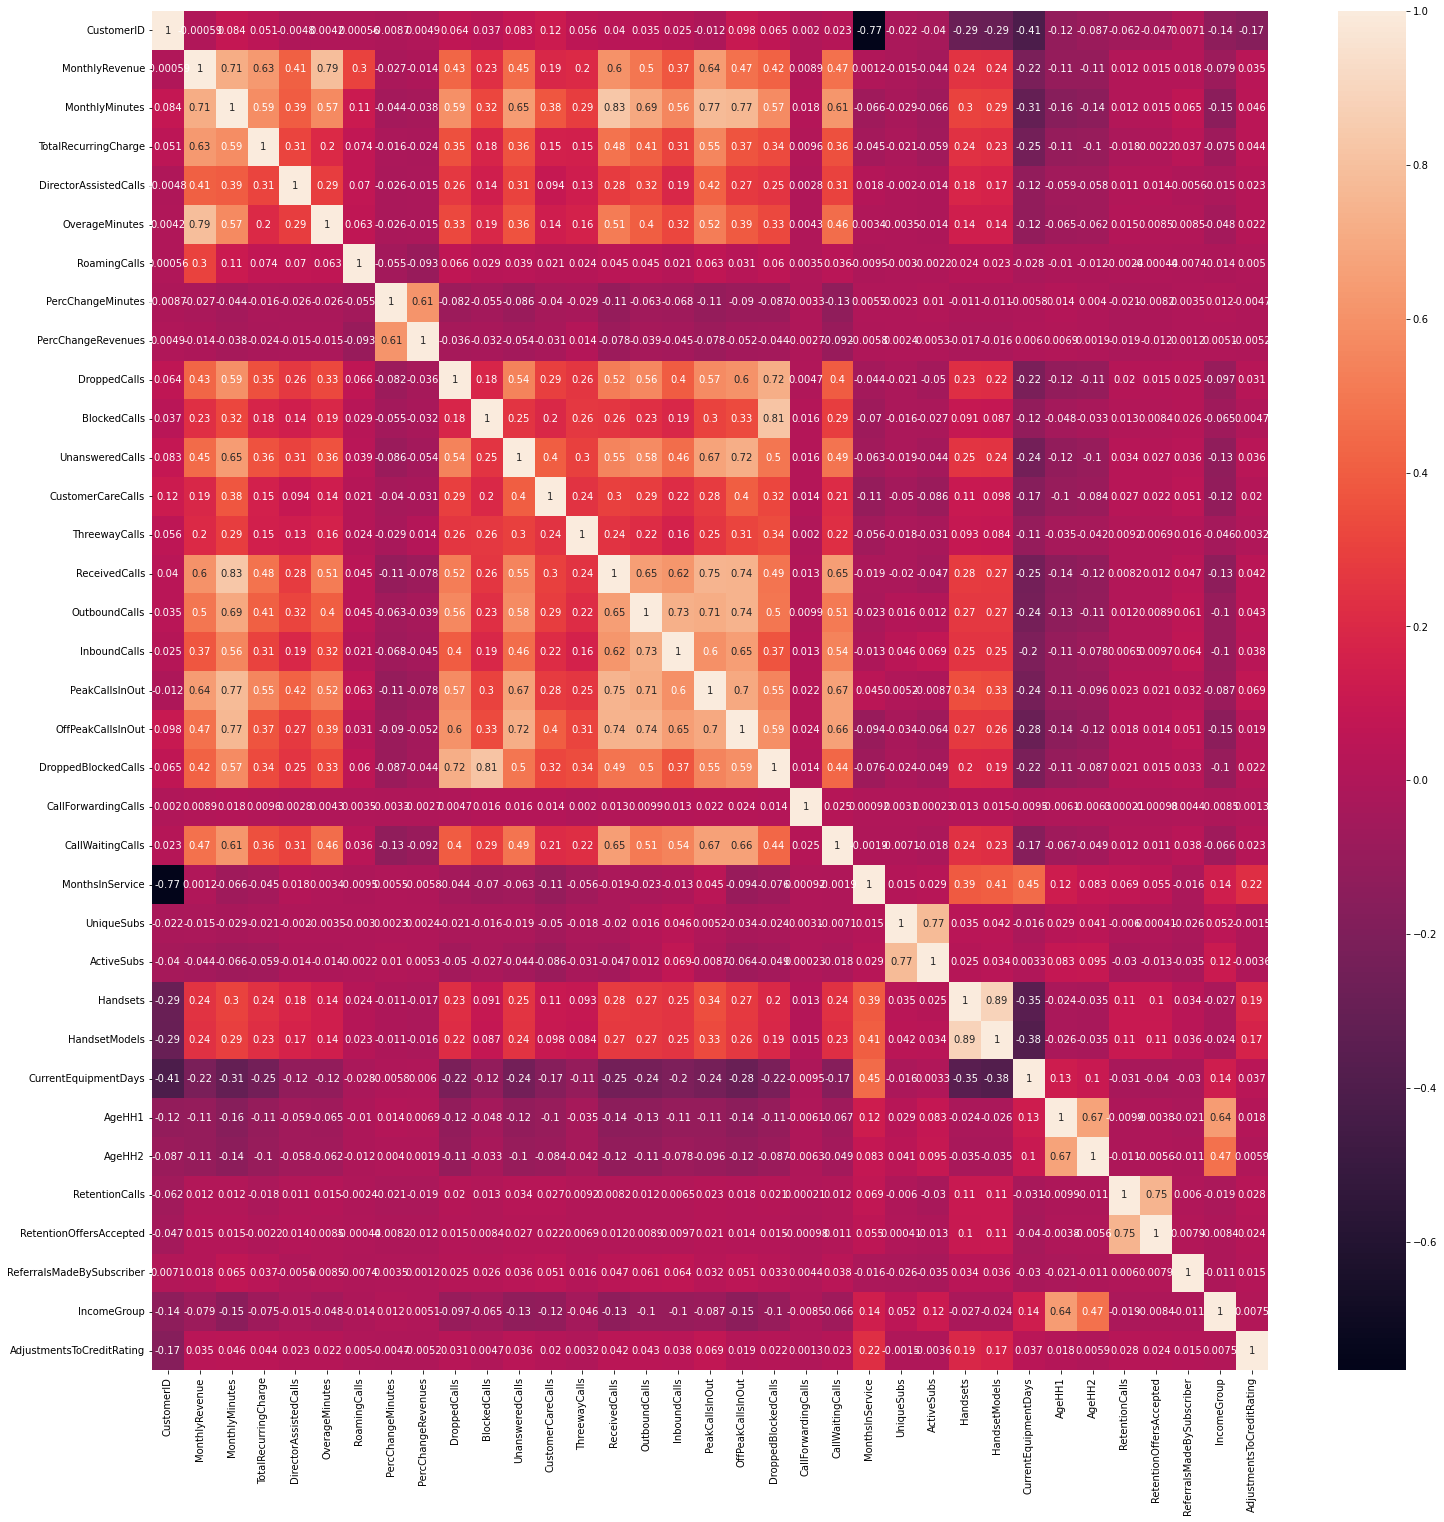

In [92]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_df.corr(),annot=True)
plt.show()

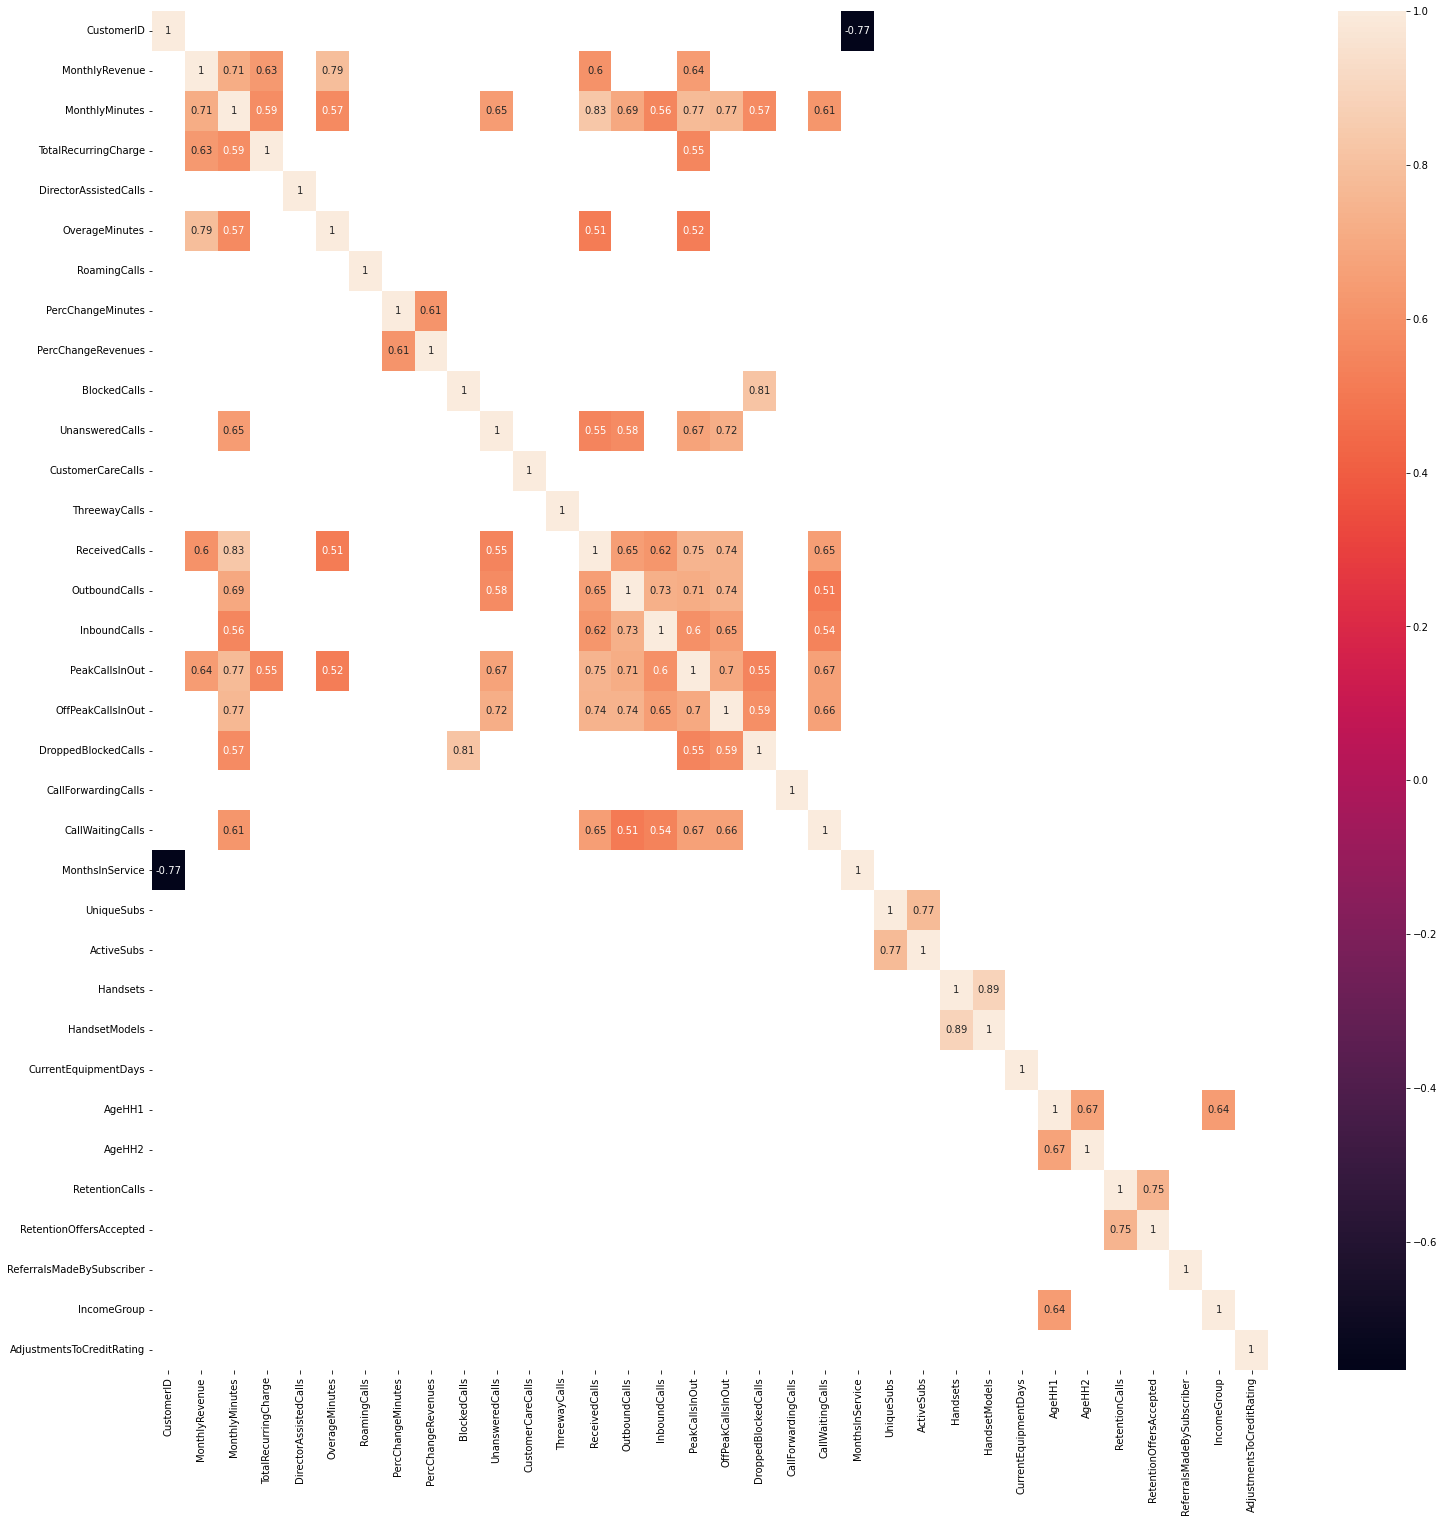

In [93]:
# To Check if it helps after removing Blocked Calls
plt.figure(figsize=(25,25))
corr_df1 = corr_df.drop(['DroppedCalls'],axis=1)
sns.heatmap(corr_df1.corr()[(corr_df.corr() >= 0.5) | (corr_df.corr() <= -0.5)],annot=True)
plt.show()

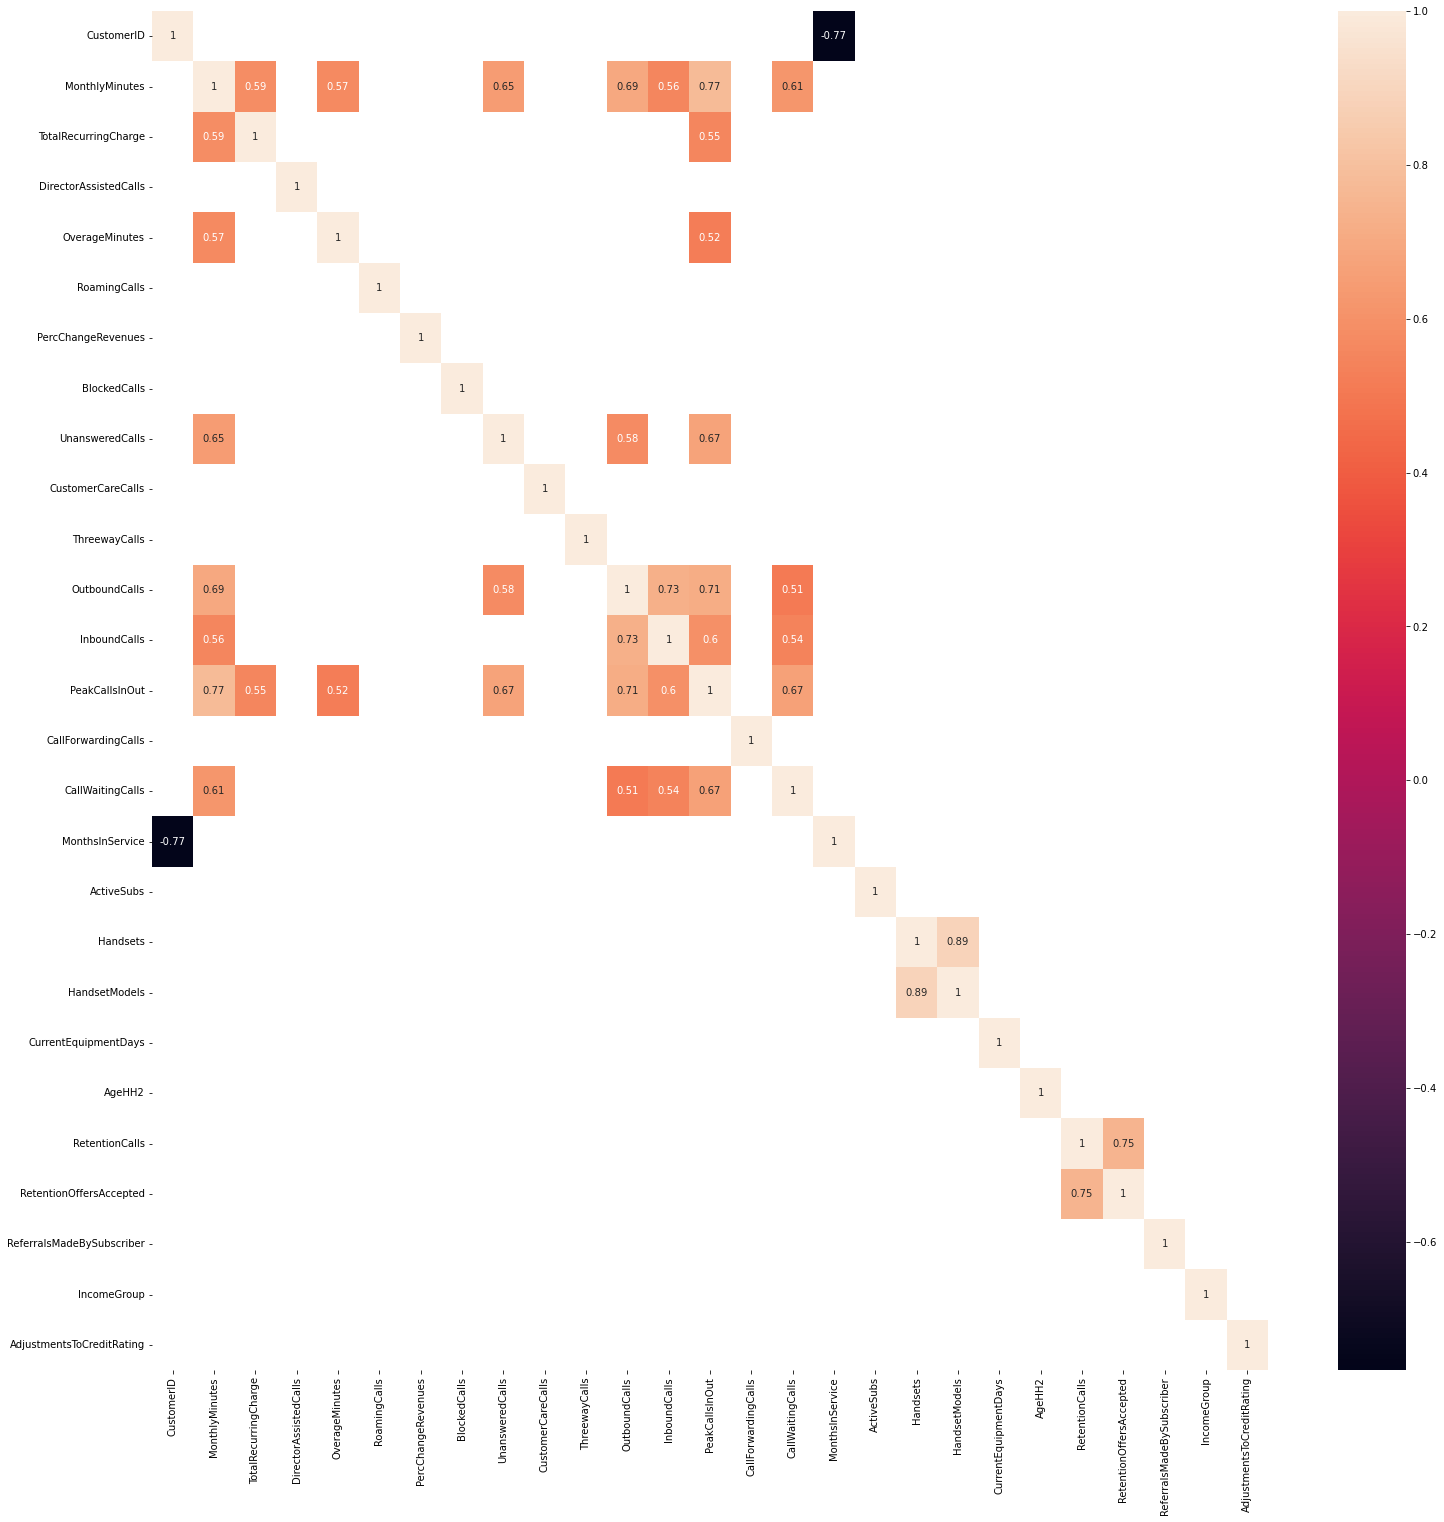

In [94]:
# Check if Unique Subs and PeakCallsInOut Helps
corr_df2 = corr_df1.drop(['UniqueSubs','DroppedBlockedCalls','OffPeakCallsInOut','MonthlyRevenue',
                          'AgeHH1','ReceivedCalls','PercChangeMinutes'],axis=1)
plt.figure(figsize=(25,25))

sns.heatmap(corr_df2.corr()[(corr_df2.corr() >= 0.5) | (corr_df2.corr() <= -0.5)],annot=True)
plt.show()

In [95]:
col = ['MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeRevenues', 'BlockedCalls', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating']

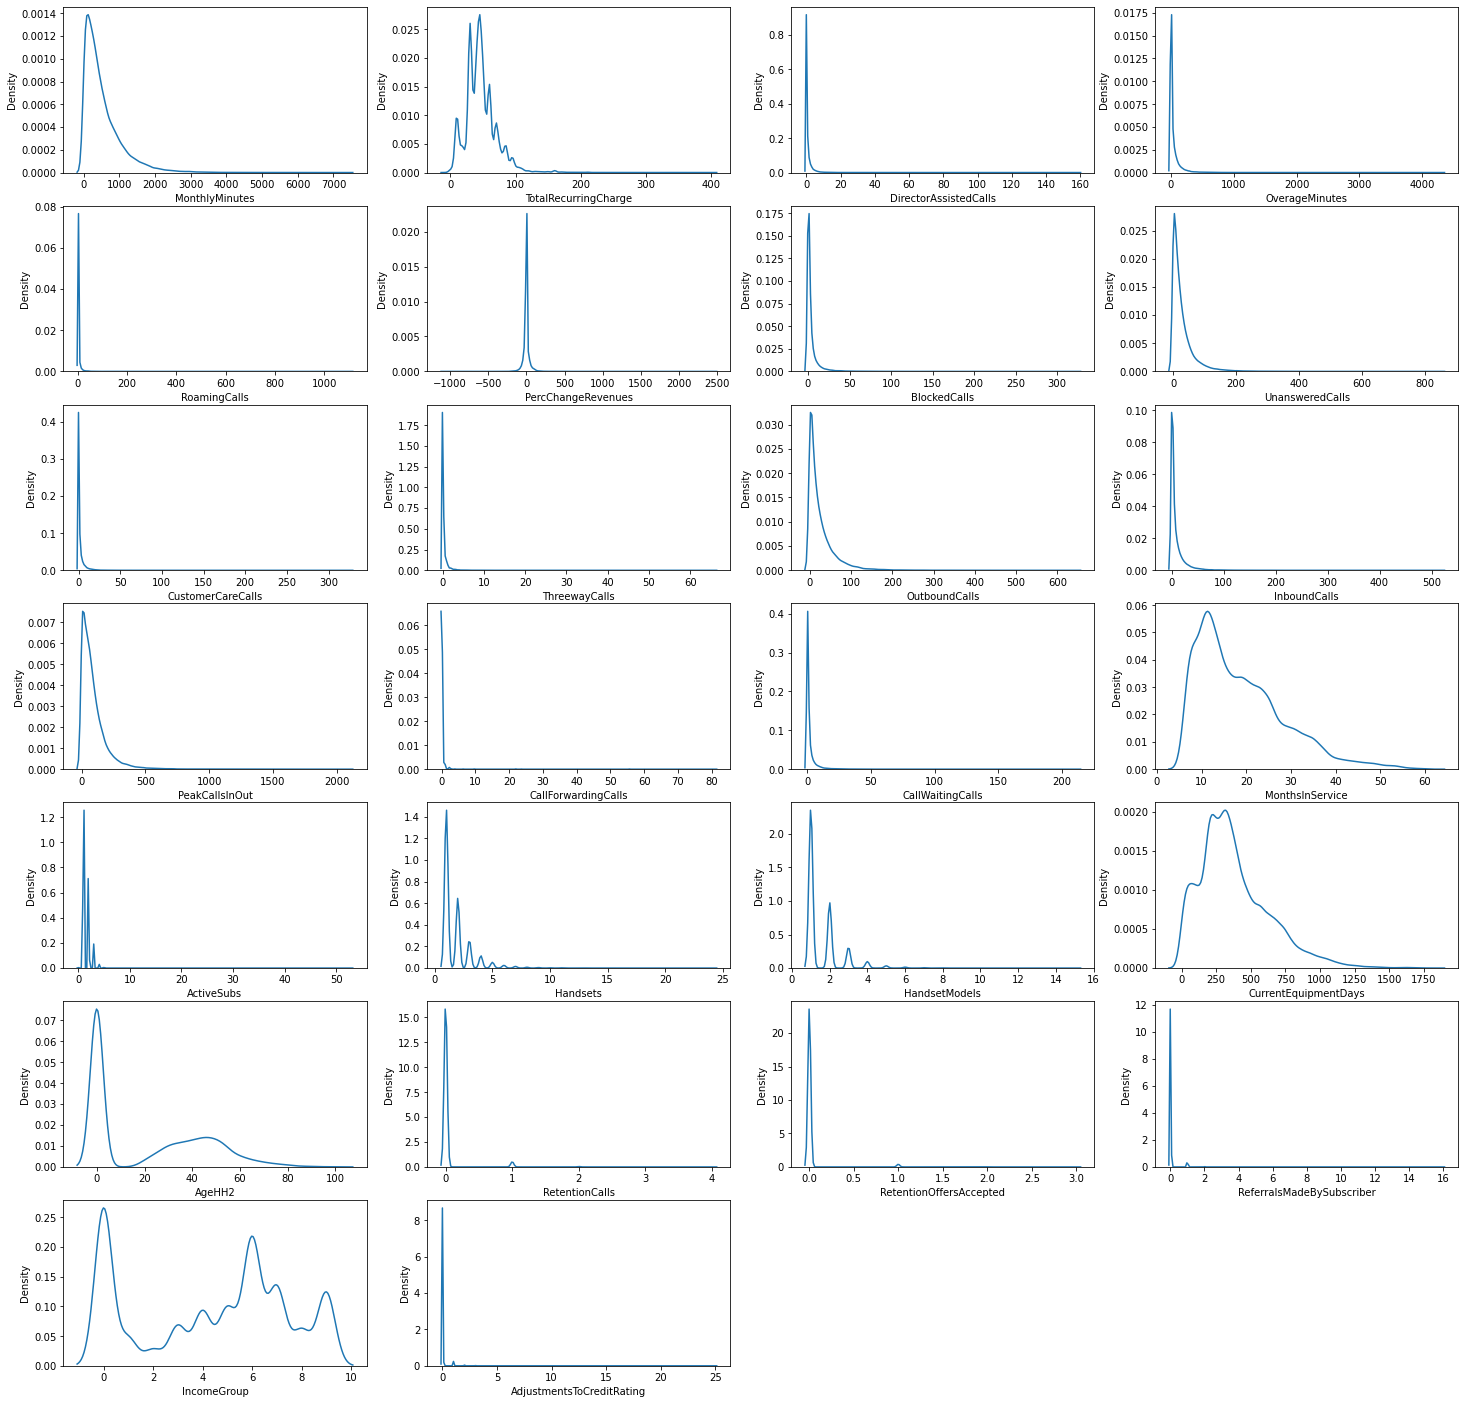

In [96]:
plt.figure(figsize=(25,25))
for i, j in enumerate(col):
    plt.subplot(7,4,i+1)
    sns.kdeplot(df[j])
plt.show()

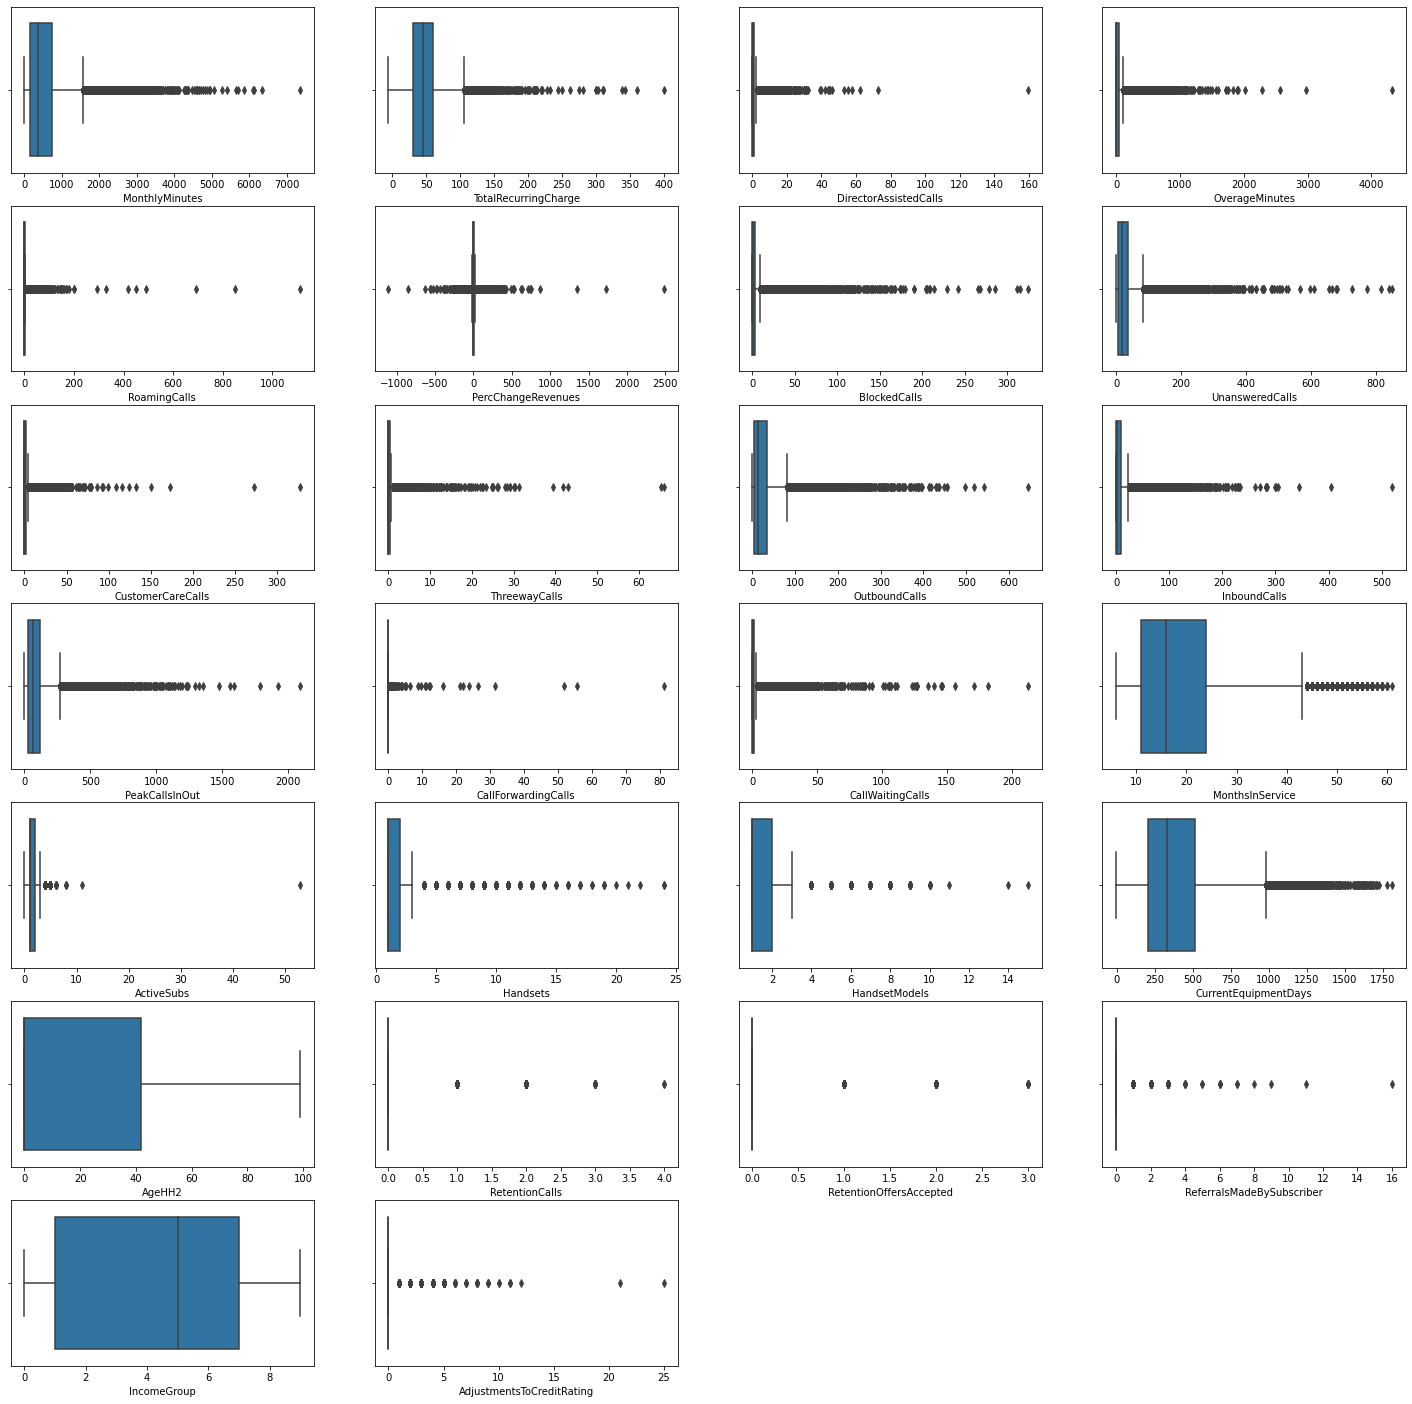

In [97]:
plt.figure(figsize=(25,25))
for i, j in enumerate(col):
    plt.subplot(7,4,i+1)
    sns.boxplot(df[j])
plt.show()

In [98]:
df2 = df.copy()

In [99]:
df3 = df2.drop(['HandsetModels','RetentionCalls','ReferralsMadeBySubscriber',
          'IncomeGroup','AdjustmentsToCreditRating','ServiceArea','UniqueSubs','DroppedBlockedCalls',
          'OffPeakCallsInOut','MonthlyRevenue','AgeHH1','ReceivedCalls','PercChangeMinutes','DroppedCalls','HandsetPrice','NonUSTravel',
                'NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam','RespondsToMailOffers'],axis=1)

In [100]:
df3.set_index('CustomerID',inplace=True)

In [101]:
df3.head()

,Churn,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeRevenues,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,InboundCalls,PeakCallsInOut,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,OptOutMailings,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000002,Yes,219.0,22.0,0.25,0.0,0.0,-19.0,0.7,6.3,0.0,0.0,0.0,0.0,58.0,0.0,0.3,61,1,2.0,361.0,0.0,No,No,Yes,No,No,Known,Yes,No,Yes,Yes,0,No,1-Highest,Suburban,Professional,No
3000010,Yes,10.0,17.0,0.00,0.0,0.0,0.0,0.0,2.7,0.0,0.0,0.0,0.0,5.0,0.0,0.0,58,1,2.0,1504.0,42.0,Yes,No,No,No,No,Known,Yes,No,Yes,Yes,0,Yes,4-Medium,Suburban,Professional,Yes
3000014,No,8.0,38.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,1.3,0.0,0.0,60,1,1.0,1812.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,Yes,0,Yes,3-Good,Town,Crafts,Yes
3000022,No,1312.0,75.0,1.24,0.0,0.0,8.1,7.7,76.0,4.3,1.3,370.3,147.0,555.7,0.0,22.7,59,2,9.0,458.0,0.0,No,No,Yes,No,No,Known,Yes,No,No,Yes,0,Yes,4-Medium,Other,Other,No
3000026,Yes,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,54.0,No,No,No,No,No,Known,Yes,No,Yes,Yes,0,No,1-Highest,Other,Professional,Yes


In [102]:
X = df3.drop('Churn',axis=1)
y = df3[['Churn']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

In [103]:
X_train.head()

,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeRevenues,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,InboundCalls,PeakCallsInOut,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,OptOutMailings,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3358790,217.0,43.0,0.0,0.0,7.7,-4.5,2.0,8.7,0.0,0.0,21.3,1.7,26.7,0.0,1.0,9,1,1.0,265.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,0,No,3-Good,Other,Other,Unknown
3005634,94.0,45.0,0.0,0.0,0.0,-0.1,3.0,25.0,0.0,0.0,4.3,0.0,29.3,0.0,0.0,45,1,1.0,1364.0,44.0,Yes,No,No,No,No,Known,Yes,No,No,Yes,0,No,2-High,Other,Professional,Yes
3084586,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26,1,2.0,205.0,0.0,No,Yes,Yes,No,No,Known,Yes,No,No,Yes,0,Yes,2-High,Other,Other,No
3255690,36.0,10.0,0.5,0.0,0.2,-1.2,0.0,4.7,0.0,0.0,5.7,4.3,13.3,0.0,0.0,10,2,1.0,297.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,0,No,5-Low,Other,Other,Unknown
3099678,1014.0,50.0,0.0,302.0,0.0,-54.2,2.3,107.0,2.0,0.3,43.3,13.7,302.0,0.0,5.3,22,1,2.0,397.0,0.0,No,No,Yes,No,No,Known,Yes,No,No,Yes,0,No,1-Highest,Other,Other,Yes


In [104]:
num_xtrain = X_train.select_dtypes(include=[np.number])
num_xtest = X_test.select_dtypes(include=[np.number])

cat_xtrain = X_train.select_dtypes(include=[np.object])
cat_xtest = X_test.select_dtypes(include=[np.object])

encode = {'Yes':1 , 'No' : 0}
y_train['Churn'] = y_train['Churn'].map(encode)
y_test['Churn'] = y_test['Churn'].map(encode)

In [105]:
num_xtrain_va = num_xtrain[['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls']]
num_xtest_va = num_xtest[['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls']]

num_xtrain.drop('RetentionOffersAccepted',axis=1,inplace=True)
num_xtest.drop('RetentionOffersAccepted',axis=1,inplace=True)

num_xtrain_sc = num_xtrain.drop(['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls'],axis=1)
num_xtest_sc = num_xtest.drop(['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls'],axis=1)


In [106]:
# Converting value added services into binary
lst = ['DirectorAssistedCalls','OverageMinutes','RoamingCalls','ThreewayCalls','CallForwardingCalls','CallWaitingCalls']
for i in lst:
    num_xtrain_va[i] = num_xtrain[i].apply(lambda x : 0 if x == 0.0 else 1)
    num_xtest_va[i] = num_xtest[i].apply(lambda x : 0 if x ==0.0 else 1)


In [107]:
# scaling numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

In [108]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [109]:
num_xtrain_ss = pd.DataFrame(ss.fit_transform(num_xtrain_sc),columns=num_xtrain_sc.columns,index=num_xtrain_sc.index)
num_xtest_ss = pd.DataFrame(ss.transform(num_xtest_sc),columns=num_xtest_sc.columns,index=num_xtest_sc.index)

num_xtrain_mm = pd.DataFrame(mm.fit_transform(num_xtrain_sc),columns=num_xtrain_sc.columns,index=num_xtrain_sc.index)
num_xtest_mm = pd.DataFrame(mm.transform(num_xtest_sc),columns=num_xtest_sc.columns,index=num_xtest_sc.index)

In [110]:
x_train_fullss = pd.concat([num_xtrain_ss,num_xtrain_va],axis=1)
x_test_fullss = pd.concat([num_xtest_ss,num_xtest_va],axis=1)

In [111]:
x_train_fullmm = pd.concat([num_xtrain_mm,num_xtrain_va],axis=1)
x_test_fullmm = pd.concat([num_xtest_mm,num_xtest_va],axis=1)

In [112]:
num_xtrain_pt = pd.DataFrame(pt.fit_transform(num_xtrain_sc),columns=num_xtrain_sc.columns,index=num_xtrain_sc.index)
num_xtest_pt = pd.DataFrame(pt.transform(num_xtest_sc),columns=num_xtest_sc.columns,index=num_xtest_sc.index)

x_train_fullpt = pd.concat([num_xtrain_pt,num_xtrain_va],axis=1)
x_test_fullpt = pd.concat([num_xtest_pt,num_xtest_va],axis=1)

## Categorical Data Handling

In [113]:
cat_xtrain.drop(['PrizmCode','Occupation','MaritalStatus'],axis=1,inplace=True)
cat_xtest.drop(['PrizmCode','Occupation','MaritalStatus'],axis=1,inplace=True)

In [114]:
cat_xtrain.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,OptOutMailings,OwnsComputer,HasCreditCard,NewCellphoneUser,CreditRating
CustomerID,,,,,,,,,,,,
3358790,No,No,Yes,No,No,Unknown,No,No,No,No,No,3-Good
3005634,Yes,No,No,No,No,Known,Yes,No,No,Yes,No,2-High
3084586,No,Yes,Yes,No,No,Known,Yes,No,No,Yes,Yes,2-High
3255690,No,No,Yes,No,No,Unknown,No,No,No,No,No,5-Low
3099678,No,No,Yes,No,No,Known,Yes,No,No,Yes,No,1-Highest


In [115]:
encode = {'Yes':1 , 'No' : 0}
encode_1 = {'Known':1 , 'Unknown' : 0}

cat_xtrain['ChildrenInHH'] = cat_xtrain['ChildrenInHH'].map(encode)
cat_xtest['ChildrenInHH'] = cat_xtest['ChildrenInHH'].map(encode)

cat_xtrain['HandsetRefurbished'] = cat_xtrain['HandsetRefurbished'].map(encode)
cat_xtest['HandsetRefurbished'] = cat_xtest['HandsetRefurbished'].map(encode)

cat_xtrain['HandsetWebCapable'] = cat_xtrain['HandsetWebCapable'].map(encode)
cat_xtest['HandsetWebCapable'] = cat_xtest['HandsetWebCapable'].map(encode)

cat_xtrain['TruckOwner'] = cat_xtrain['TruckOwner'].map(encode)
cat_xtest['TruckOwner'] = cat_xtest['TruckOwner'].map(encode)

cat_xtrain['RVOwner'] = cat_xtrain['RVOwner'].map(encode)
cat_xtest['RVOwner'] = cat_xtest['RVOwner'].map(encode)

cat_xtrain['Homeownership'] = cat_xtrain['Homeownership'].map(encode_1)
cat_xtest['Homeownership'] = cat_xtest['Homeownership'].map(encode_1)

cat_xtrain['BuysViaMailOrder'] = cat_xtrain['BuysViaMailOrder'].map(encode)
cat_xtest['BuysViaMailOrder'] = cat_xtest['BuysViaMailOrder'].map(encode)


cat_xtrain['OptOutMailings'] = cat_xtrain['OptOutMailings'].map(encode)
cat_xtest['OptOutMailings'] = cat_xtest['OptOutMailings'].map(encode)


cat_xtrain['OwnsComputer'] = cat_xtrain['OwnsComputer'].map(encode)
cat_xtest['OwnsComputer'] = cat_xtest['OwnsComputer'].map(encode)

cat_xtrain['HasCreditCard'] = cat_xtrain['HasCreditCard'].map(encode)
cat_xtest['HasCreditCard'] = cat_xtest['HasCreditCard'].map(encode)

cat_xtrain['NewCellphoneUser'] = cat_xtrain['NewCellphoneUser'].map(encode)
cat_xtest['NewCellphoneUser'] = cat_xtest['NewCellphoneUser'].map(encode)


In [116]:
cat_xtrain['CreditRating'].unique()

array(['3-Good', '2-High', '5-Low', '1-Highest', '4-Medium', '7-Lowest',
       '6-VeryLow'], dtype=object)

In [117]:
encode2 = {'7-Lowest' : 1,'6-VeryLow' : 2,'5-Low' : 3,'4-Medium' : 4,'3-Good' : 5,'2-High' : 6,'1-Highest' : 7}
cat_xtrain['CreditRating'] = cat_xtrain['CreditRating'].map(encode2)
cat_xtest['CreditRating'] = cat_xtest['CreditRating'].map(encode2)

In [118]:
X_train_ss = pd.concat([x_train_fullss,cat_xtrain],axis=1)
X_test_ss = pd.concat([x_test_fullss,cat_xtest],axis=1)

In [119]:
X_train_mm = pd.concat([x_train_fullmm,cat_xtrain],axis=1)
X_test_mm = pd.concat([x_test_fullmm,cat_xtest],axis=1)

In [120]:
X_train_pt = pd.concat([x_train_fullpt,cat_xtrain],axis=1)
X_test_pt = pd.concat([x_test_fullpt,cat_xtest],axis=1)

### VIF

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Standard Scaler
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_ss.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_ss.values, i)
                          for i in range(len(X_train_mm.columns))]
  
print(vif_data)

                  feature       VIF
0          MonthlyMinutes  3.749730
1    TotalRecurringCharge  1.731368
2      PercChangeRevenues  1.009128
3            BlockedCalls  1.167577
4         UnansweredCalls  2.221752
5       CustomerCareCalls  1.332433
6           OutboundCalls  3.155269
7            InboundCalls  2.238011
8          PeakCallsInOut  3.743935
9         MonthsInService  2.337491
10             ActiveSubs  1.075503
11               Handsets  2.214138
12   CurrentEquipmentDays  2.332223
13                 AgeHH2  1.688184
14  DirectorAssistedCalls  2.364013
15         OverageMinutes  2.731527
16           RoamingCalls  1.512643
17          ThreewayCalls  1.591826
18    CallForwardingCalls  1.012891
19       CallWaitingCalls  2.709275
20           ChildrenInHH  1.748560
21     HandsetRefurbished  1.248317
22      HandsetWebCapable  8.221456
23             TruckOwner  2.218421
24                RVOwner  1.771550
25          Homeownership  9.116523
26       BuysViaMailOrder  2

# Model Building

In [123]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

log_modelss = lg.fit(X_train_ss,y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [124]:
y_pred_train = log_modelss.predict(X_train_ss)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.71      1.00      0.83     24855
           1       0.46      0.00      0.01      9971

    accuracy                           0.71     34826
   macro avg       0.59      0.50      0.42     34826
weighted avg       0.64      0.71      0.60     34826



In [125]:
y_pred_test = log_modelss.predict(X_test_ss)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.71      1.00      0.83     10652
           1       0.40      0.00      0.01      4274

    accuracy                           0.71     14926
   macro avg       0.56      0.50      0.42     14926
weighted avg       0.63      0.71      0.60     14926



In [126]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

log_modelmm = lg.fit(X_train_mm,y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve

In [127]:
y_pred_train = log_modelmm.predict(X_train_mm)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.71      1.00      0.83     24855
           1       0.43      0.00      0.01      9971

    accuracy                           0.71     34826
   macro avg       0.57      0.50      0.42     34826
weighted avg       0.63      0.71      0.60     34826



In [128]:
y_pred_test = log_modelmm.predict(X_test_mm)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.71      1.00      0.83     10652
           1       0.38      0.00      0.01      4274

    accuracy                           0.71     14926
   macro avg       0.55      0.50      0.42     14926
weighted avg       0.62      0.71      0.60     14926



In [129]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

log_modelpt = lg.fit(X_train_pt,y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [130]:
y_pred_train = log_modelpt.predict(X_train_pt)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.71      1.00      0.83     24855
           1       0.36      0.00      0.01      9971

    accuracy                           0.71     34826
   macro avg       0.54      0.50      0.42     34826
weighted avg       0.61      0.71      0.60     34826



In [131]:
y_pred_test = log_modelpt.predict(X_test_pt)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.71      1.00      0.83     10652
           1       0.32      0.00      0.01      4274

    accuracy                           0.71     14926
   macro avg       0.52      0.50      0.42     14926
weighted avg       0.60      0.71      0.60     14926



# Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier()

In [134]:
rf_model = rf.fit(X_train_pt,y_train)

In [135]:
y_pred_train = rf_model.predict(X_train_pt)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00      9971

    accuracy                           1.00     34826
   macro avg       1.00      1.00      1.00     34826
weighted avg       1.00      1.00      1.00     34826



In [136]:
y_pred_test = rf_model.predict(X_test_pt)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.72      0.97      0.83     10652
           1       0.54      0.08      0.13      4274

    accuracy                           0.72     14926
   macro avg       0.63      0.52      0.48     14926
weighted avg       0.67      0.72      0.63     14926



# XG Boost

In [137]:
from xgboost import XGBClassifier

In [138]:
xgc = XGBClassifier()

In [139]:
xgb_model = xgc.fit(X_train_pt,y_train)

In [140]:
y_pred_train = xgb_model.predict(X_train_pt)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.79      0.98      0.88     24855
           1       0.89      0.35      0.50      9971

    accuracy                           0.80     34826
   macro avg       0.84      0.67      0.69     34826
weighted avg       0.82      0.80      0.77     34826



In [141]:
y_pred_test = xgb_model.predict(X_test_pt)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.73      0.94      0.82     10652
           1       0.48      0.15      0.22      4274

    accuracy                           0.71     14926
   macro avg       0.60      0.54      0.52     14926
weighted avg       0.66      0.71      0.65     14926



# AdaBoost

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
ada = AdaBoostClassifier()

In [144]:
ada_model = ada.fit(X_train_pt,y_train)

In [145]:
y_pred_train = ada_model.predict(X_train_pt)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.72      0.98      0.83     24855
           1       0.55      0.06      0.11      9971

    accuracy                           0.72     34826
   macro avg       0.64      0.52      0.47     34826
weighted avg       0.67      0.72      0.62     34826



In [146]:
y_pred_test = ada_model.predict(X_test_pt)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.72      0.98      0.83     10652
           1       0.54      0.06      0.11      4274

    accuracy                           0.72     14926
   macro avg       0.63      0.52      0.47     14926
weighted avg       0.67      0.72      0.62     14926



## XNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [148]:
kn_model = kn.fit(X_train_pt,y_train)

In [149]:
y_pred_train = kn_model.predict(X_train_pt)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.78      0.93      0.85     24855
           1       0.67      0.36      0.47      9971

    accuracy                           0.76     34826
   macro avg       0.72      0.64      0.66     34826
weighted avg       0.75      0.76      0.74     34826



In [150]:
y_pred_test = kn_model.predict(X_test_pt)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.72      0.86      0.79     10652
           1       0.35      0.18      0.24      4274

    accuracy                           0.67     14926
   macro avg       0.54      0.52      0.51     14926
weighted avg       0.62      0.67      0.63     14926



## Naive Bayes

In [151]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [152]:
gnb_model = gnb.fit(X_train_pt,y_train)

In [153]:
y_pred_train = gnb_model.predict(X_train_pt)
print('Classification Report for Train Data : \n\n',classification_report(y_train,y_pred_train))

Classification Report for Train Data : 

               precision    recall  f1-score   support

           0       0.73      0.83      0.78     24855
           1       0.37      0.25      0.30      9971

    accuracy                           0.66     34826
   macro avg       0.55      0.54      0.54     34826
weighted avg       0.63      0.66      0.64     34826



In [154]:
y_pred_test = gnb_model.predict(X_test_pt)
print('Classification Report for Test Data : \n\n',classification_report(y_test,y_pred_test))

Classification Report for Test Data : 

               precision    recall  f1-score   support

           0       0.74      0.83      0.78     10652
           1       0.38      0.26      0.31      4274

    accuracy                           0.66     14926
   macro avg       0.56      0.54      0.54     14926
weighted avg       0.63      0.66      0.64     14926

